## **Loading Required packages and Data**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## **Data Splitting**




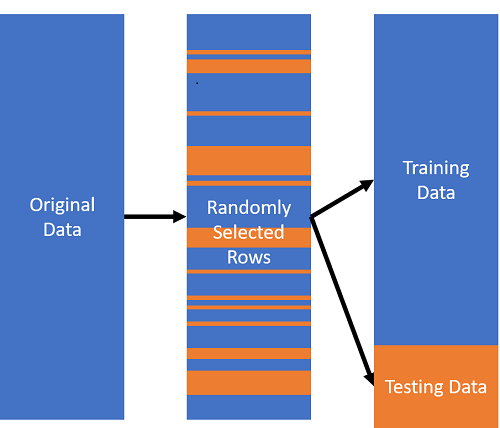

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 147s 1us/step


In [3]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(x_train.shape, y_train.shape))

Previous X_train shape: (50000, 32, 32, 3) 
Previous Y_train shape:(50000, 1)


## **Normalization**

In [4]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


## **Class Names**

In [6]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## **Model Definition**

Using Flatten, 3 dense layers of 512, 256 and 10 Neurons

In [34]:
# Build a simple ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    layers.Dense(512, activation='relu'),  # First dense layer with 512 units
    layers.Dense(256, activation='relu'),  # Second dense layer with 256 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (one for each class)
])


## **Model Compilation**

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## **Model Training**

In [36]:
# Train the model
history = model.fit(x_train, y_train, epochs=20,batch_size=200,
                    validation_data=(x_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2568 - loss: 2.1316 - val_accuracy: 0.3736 - val_loss: 1.7573
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3792 - loss: 1.7354 - val_accuracy: 0.3949 - val_loss: 1.6950
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4174 - loss: 1.6354 - val_accuracy: 0.4419 - val_loss: 1.5670
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4462 - loss: 1.5651 - val_accuracy: 0.4608 - val_loss: 1.5078
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4606 - loss: 1.5062 - val_accuracy: 0.4374 - val_loss: 1.5670
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4778 - loss: 1.4692 - val_accuracy: 0.4790 - val_loss: 1.4642
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4890 - loss: 1.4402 - val_accuracy: 0.4684 - val_loss: 1.4932
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5025 - loss: 1.4050 - val_acc

## **Model Evaluation**

In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.5197 - loss: 1.3580

Test accuracy: 0.5196999907493591


## **Data Visualization**

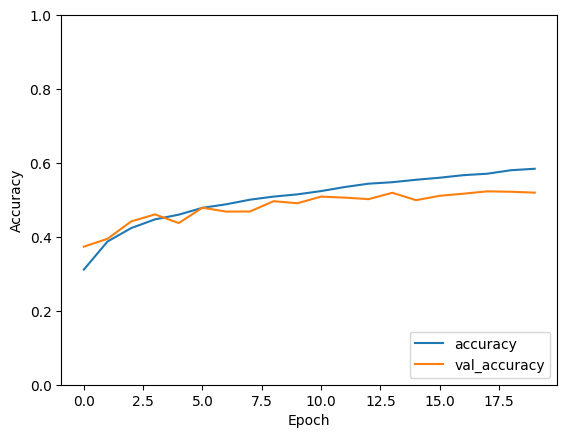

In [38]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



In [39]:

# Predict the first 5 images in the test set
predictions = model.predict(x_test[:10])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


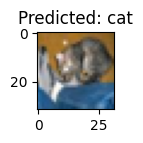

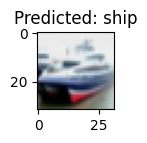

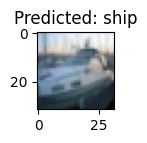

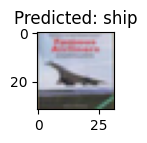

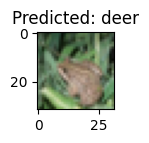

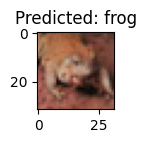

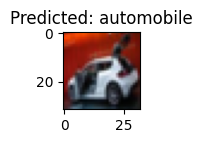

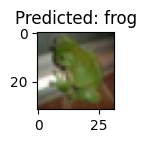

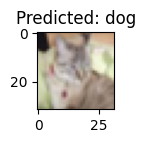

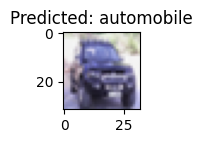

In [40]:
# Display the predictions

for i in range(10):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {class_names[predictions[i].argmax()]}')
    plt.show()

## **Assignment**

Repeat this program using different hyperparameters, take readings everytime you run this code with a different hyperparameter. Try to improve accuracy as much as you can.



Best of Luck